In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from multiprocessing import Pool

In [2]:
folder = "csv_data/gf_{}"
fn = "gs_{}.csv"
gf2id = {2: 0, 4: 1, 16: 2, 256: 3}
field = 256
ex_cmd = "../source/moepvalidator/build/main -g {} -i {} -c {} -p 50 -f {} -m"

# read out of the csv file
# df = pd.read_csv("data.csv")
# create plots: histogram for several field sizes and loss rates, plot x=packet size, y=prob, made out of 1000-10000 iterations
# save them

In [ ]:
# create csv files
gf = gf2id[field]
fol = folder.format(field)
os.makedirs(fol, exist_ok=True)
def f(i):
    re = os.system(ex_cmd.format(i, 10000, os.path.join(fol, fn.format(i)), gf))
    assert re == 0


#for i in range(1, 10000):
    # if i%10 == 0:
    #     print(".", end="")
    #re = os.system(ex_cmd.format(i, 10000, os.path.join(fol, fn.format(i)), gf))
    #assert re == 0
with Pool(24) as p:
    p.map(f, range(1, 10000))
    

Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation pr

In [185]:
# to install in arch and getting a weird virtal:world error, set the suggest env var PKG_CONFIG_PATH="/usr/local/lib/pkgconfig"
# and conf it again then make it, should work
# create csv files
#field = 2
for field in [2, 4, 16, 256]:
    gf = gf2id[field]
    fol = folder.format(field)
    os.makedirs(fol, exist_ok=True)
    def f(i):
        re = os.system(ex_cmd.format(i, 5000, os.path.join(fol, fn.format(i)), gf))
        assert re == 0

    with Pool(24) as p:
        p.map(f, range(1, 100))
    print("finished first")

Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation pr

Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation pr

Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation program run through without errors!
Validation pr

In [187]:
dfs = {}
for field in [2, 4, 16, 256]:
    gf = gf2id[field]
    fol = folder.format(field)
    dfs[field] = []
    #for i in range(1, 1000, 50):
    for i in range(1, 100):
        dfs[field].append(pd.read_csv(os.path.join(fol, fn.format(i))))

In [188]:
import math
#dfs[256]
# TODO theory vales
def theory(gen_size, gf):
    #print(float(gf)**gen_size, gf, gen_size)
    #return np.prod([(1 - math.pow(np.float128(gf), i - 1)) / math.pow(np.float128(gf),gen_size) for i in range(gen_size)])
    out = np.float128(1)
    for i in range(1, gen_size+1):
        #out *= 1 - math.pow(gf, i - 1) / math.pow(gf,gen_size)
        #out += math.ln(1-math.exp((i-1)*math.ln(gf)-gen_size*math.ln()))
        #out += math.log(1-math.pow(np.float128(gf), np.float128(i-1-gen_size)))
        #out += np.log(1-np.pow(gf, i-1-gen_size))
        #print(out)
        out *= 1 - math.pow(gf, i-1-gen_size) #/ math.pow(gf, gen_size)
    #print(out)
    #return math.exp(out)
    return out

# TODO bound
def lower_bound(gf):
    return math.gamma(1/gf)

lower_bounds = {256: 0.9960784912118471, 2: 0.288788095086602, 4: 0.68853753712033971, 16: 0.933594707399603}

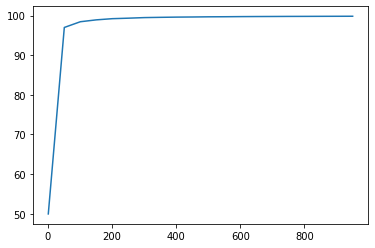

In [136]:

field = 2
# calculate averages over all iterations
gen_sizes = dfs[field]
x = []
y = []
y_t = []
for gen_size in gen_sizes:
    # iterations
    x.append(gen_size["gen_size"][0])
    lin_dep = sum(gen_size["linear_dependent"])
    frames_sent = sum(gen_size["frames_sent"])
    per_indep = (frames_sent-lin_dep)/frames_sent*100
    #print(per_indep, 100-np.mean(gen_size["percentage_linear_dependent"]))
    y.append(per_indep)
    #y_t.append(theory(gen_size["gen_size"][0], field))

# for each gf, plot x=generation size, y=percentage linear dependent
plt.plot(x, y)
#plt.plot(x, y_t, label="theory")
#plt.legend()
plt.show()


mean, std:
0.9960924999999999 0.000836028558124662
theoratical lower bound:
0.9960784912118471
derivation:
1.4008788152830576e-05


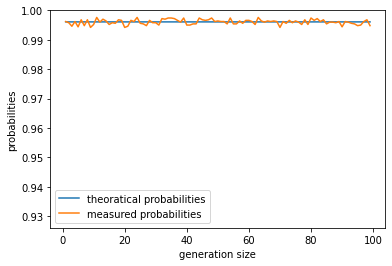

In [295]:


field = 256
# calculate averages over all iterations
gen_sizes = dfs[field]
x = []
y = []
y_t = []
for gen_size in gen_sizes:
    # iterations
    x.append(gen_size["gen_size"][0])
    y.append(sum(gen_size["linear_dependent"]==0)/len(gen_size["linear_dependent"]))
    #print(sum(gen_size["linear_dependent"]==0))
    y_t.append(theory(gen_size["gen_size"][0], field))
    

# for each gf, plot x=generation size, y=percentage linear dependent

#plt.plot((x[0], x[-1]), (lower_bounds[field], lower_bounds[field]), label="theoratical lower bound")
plt.plot(x, y_t, label="theoratical probabilities")
plt.plot(x, y, label="measured probabilities")

plt.legend()
plt.ylabel('probabilities')
plt.xlabel('generation size')
#plt.title(f"GF {field}")
if field != 256:
    plt.ylim(lower_bounds[field]-0.02, lower_bounds[field]+0.05)
else:
    plt.ylim(lower_bounds[field]-0.07, 1)
#plt.yscale("log")
#plt.show()
#plt.savefig(f"gf{field}.png", dpi=200)#, bbox_inches='tight')

# print stds and mean for larger than 20
x = np.array(x)
y = np.array(y)
print("mean, std:")
print(np.mean(y[x>=20]), np.std(y[x>=20]))
print("theoratical lower bound:")
print(lower_bounds[field])
print("derivation:")
print(abs(lower_bounds[field]-np.mean(y[x>=20])))

In [159]:
# for each gf, make histogram where x is linear independet
sum(gen_size["linear_dependent"]==0)
#y

3436

In [35]:
dfs.keys()

dict_keys([256])

In [112]:
len(gen_size["linear_dependent"])

5000

In [123]:
sum([True, False, True])

2

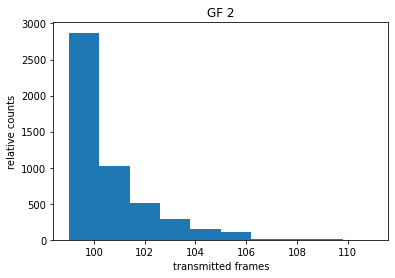

In [235]:
# # create plots: histogram for several field sizes and loss rates, plot x=packet size, y=prob, made out of 1000-10000 iterations
# histogram x=linear independet y=count
# gf256, gen_size=100, packet_size=50, iterations=5000
d = dfs[2][98]
#len(d)
plt.ylabel('relative counts')
plt.xlabel('transmitted frames')
plt.title(f"GF 2")
plt.hist(d["frames_sent"])
plt.show()

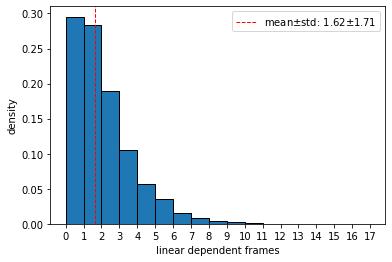

In [309]:
plt.ylabel('density')
plt.xlabel('linear dependent frames')
#plt.title(f"GF 2")
d = pd.read_csv("csv_data/gf_2/gs_100.csv")
n, bins, patches = plt.hist(d["linear_dependent"], bins=17, density=True, edgecolor="k")
#plt.xlim(0, 11)
plt.xticks(bins)
#plt.grid(color='white', lw = 0.5, axis='x')
#plt.plot([], [], ' ', label=f"mean={np.mean(d['linear_dependent']):.2f}")
#plt.plot([], [], ' ', label=f"std={np.std(d['linear_dependent']):.2f}")
plt.axvline(d['linear_dependent'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"mean$\pm$std: {np.mean(d['linear_dependent']):.2f}$\pm${np.std(d['linear_dependent']):.2f}")
plt.legend()
#plt.show()
plt.savefig(f"gf2_prefill_hist.png", dpi=200)#, bbox_inches='tight')

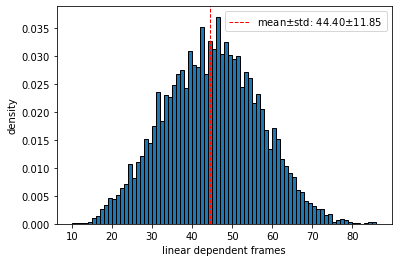

In [297]:
df2 = pd.read_csv("no_prefill.csv")
plt.ylabel('density')
plt.xlabel('linear dependent frames')
#plt.title(f"GF 2")
n, bins, patches = plt.hist(df2["linear_dependent"], bins=76, density=True, edgecolor="k")
plt.axvline(df2['linear_dependent'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"mean$\pm$std: {np.mean(df2['linear_dependent']):.2f}$\pm${np.std(df2['linear_dependent']):.2f}")
#plt.xlim(0, 11)
#plt.xticks(bins)
#plt.grid(color='white', lw = 0.5, axis='x')
plt.legend()
#plt.show()
plt.savefig(f"gf2_nonprefill_hist.png", dpi=200)#, bbox_inches='tight')

In [308]:
a = np.array(d["linear_dependent"])
sorted(a)[-1]

17

In [ ]:
# todo: some plots with frame loss
# todo some plots without seed